In [17]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [18]:
# Webscrapping Wikipedia table to get the IBEX 35 components
page = requests.get("https://es.wikipedia.org/wiki/IBEX_35")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [19]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Empresa,Sede,Entrada,Sector[29]​,ISIN,Ponderación (Sep. 2022)
0,ANA,Acciona,Alcobendas,2015,Construcción,ES0125220311,112
1,ANE,Acciona Energía,Alcobendas,2022,Energías renovables,ES0105563003,36
2,ACX,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,49
3,ACS,ACS,Madrid,1998,Construcción,ES0167050915,203
4,AENA,Aena,Madrid,2015,Transporte y distribución,ES0105046009,351
5,AMS,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,519
6,MTS,ArcelorMittal,Ciudad de Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,76
7,SAB,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,141
8,SAN,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,1201
9,BKT,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,115


In [20]:
# Add .MC to all Tickers to use them on Yahoo Finance
wiki['Ticker'] = wiki['Ticker'].apply(lambda x: x+'.MC')
wiki.head()

,Ticker,Empresa,Sede,Entrada,Sector[29]​,ISIN,Ponderación (Sep. 2022)
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,112
1,ANE.MC,Acciona Energía,Alcobendas,2022,Energías renovables,ES0105563003,36
2,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,49
3,ACS.MC,ACS,Madrid,1998,Construcción,ES0167050915,203
4,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,351


In [21]:
# Get the data for the stock ^IBEX
ibex35_list = list(wiki['Ticker'])
ibex35_list.append('^IBEX')

In [22]:
# Save all the historical data
for stock in ibex35_list:
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

num_files = len(os.listdir("../input")) 
print(f"{num_files} files downloaded")

36 files downloaded


In [23]:
# Check DataFrame
ibex35 = pd.read_csv("../input/^IBEX.csv",index_col="Date",parse_dates=True)
ibex35.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [24]:
# Check DataFrame tail
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-20,10148.099609,10158.200195,10037.500000,10101.000000,10101.000000,146798700
2023-12-21,10065.400391,10108.500000,10063.299805,10104.299805,10104.299805,84138300
2023-12-22,10094.099609,10143.099609,10081.000000,10111.900391,10111.900391,91972000
2023-12-27,10091.799805,10146.799805,10077.900391,10121.799805,10121.799805,130947500
2023-12-28,10126.299805,10136.299805,10074.599609,10086.200195,10086.200195,95148800
2023-12-29,10090.900391,10143.599609,10090.900391,10102.099609,10102.099609,101943700
2024-01-02,10161.099609,10287.900391,10122.400391,10182.099609,10182.099609,137052900
2024-01-03,10183.799805,10209.799805,10038.099609,10053.400391,10053.400391,136612300
2024-01-04,10067.500000,10190.799805,10067.500000,10182.400391,10182.400391,110894200


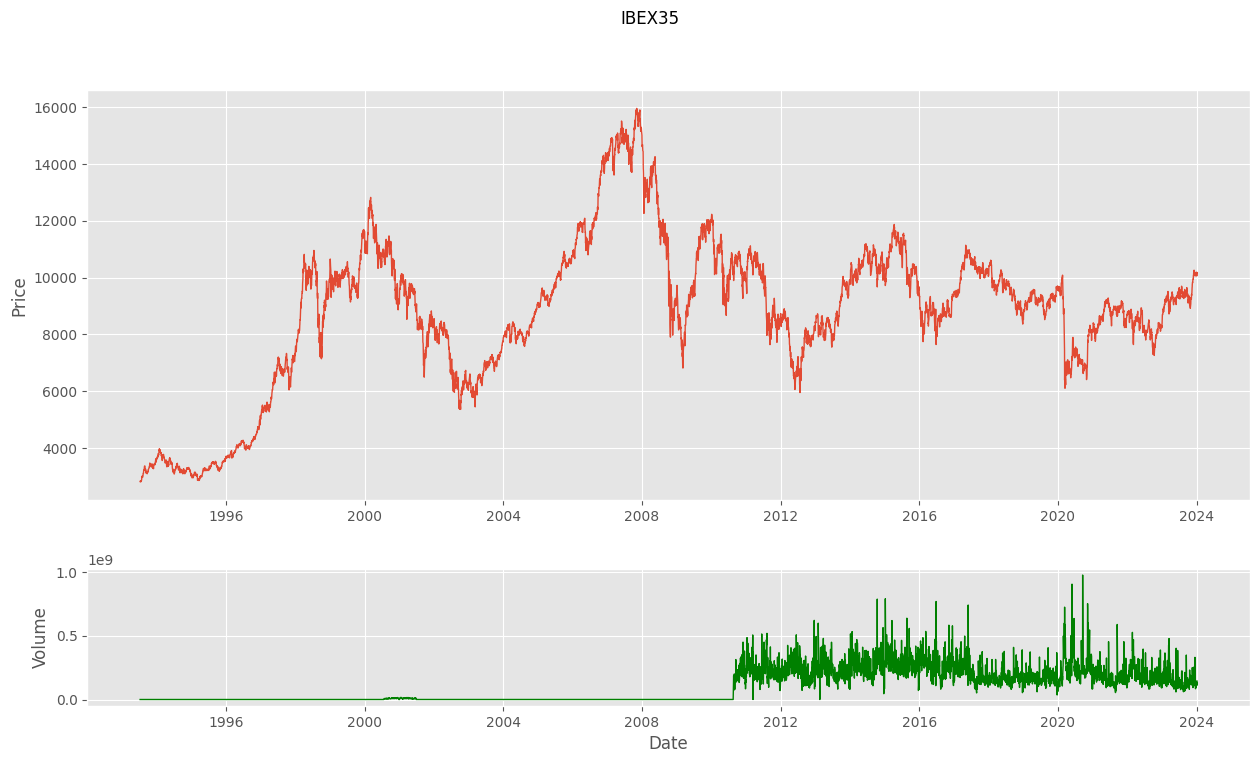

In [25]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle("IBEX35")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(ibex35['Volume'],linewidth=1,color='g')

plt.show()

In [26]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=ibex35.index,y=ibex35['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=ibex35.index,y=ibex35['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title="IBEX35")

fig.show()

In [34]:
# Configuration of year of study
year = '2023'

In [35]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
ibex35['MMA20'] = ibex35['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=ibex35["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
ibex35['BB_Upper'] = indicator_bb.bollinger_hband()
ibex35['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=ibex35["Adj Close"].loc[year], window=14)

# RSI
ibex35['RSI'] = indicator_rsi.rsi()

# Daily Return
ibex35['Daily_Return'] = daily_return(ibex35["Adj Close"].loc[year])

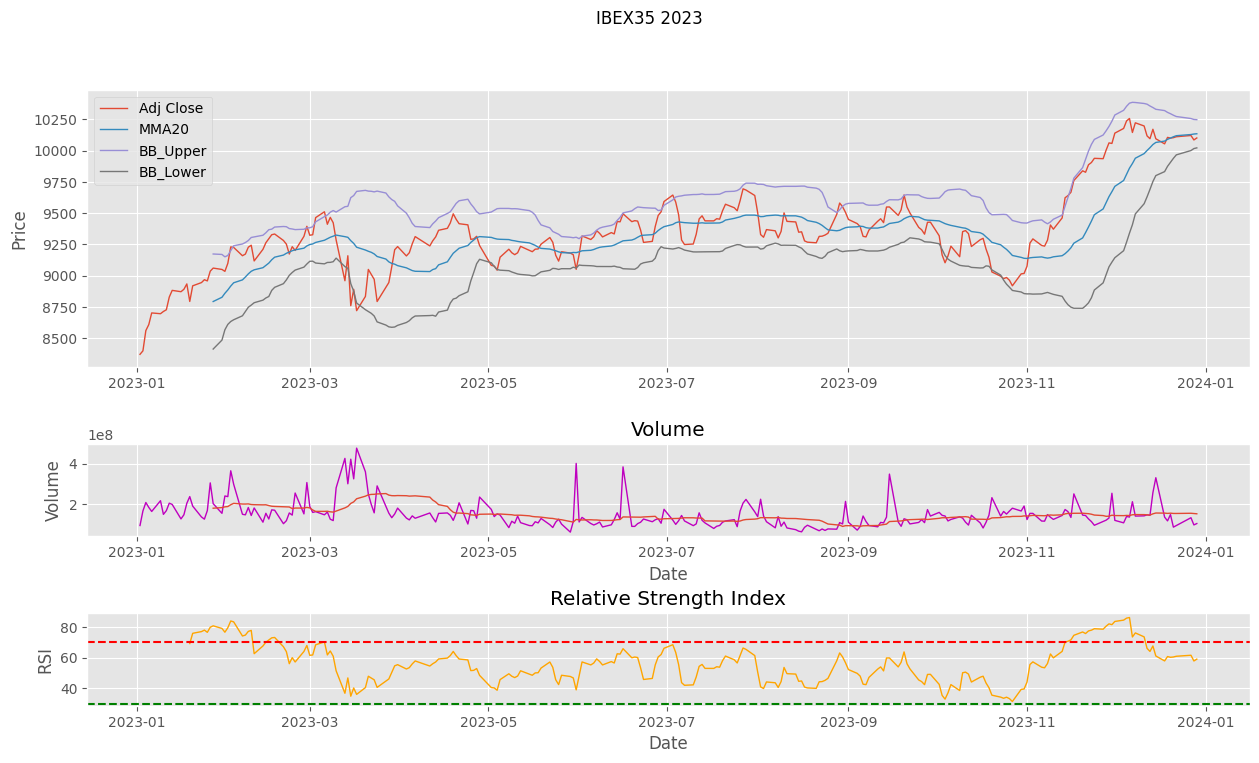

In [36]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"IBEX35 {year}")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'].loc[year],linewidth=1)
axs[0].plot(ibex35['MMA20'],linewidth=1) 
axs[0].plot(ibex35['BB_Upper'],linewidth=1)
axs[0].plot(ibex35['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(ibex35['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(ibex35['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(ibex35['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [37]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=ibex35['Adj Close'].loc[year].index,y=ibex35['Adj Close'].loc['2023'],mode="lines",name='IBEX35'),row=1,col=1)
fig.add_trace(go.Scatter(x=ibex35['BB_Lower'].loc[year].index,y=ibex35['BB_Lower'].loc['2023'],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=ibex35['BB_Upper'].loc[year].index,y=ibex35['BB_Upper'].loc['2023'],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=ibex35['MMA20'].loc[year].index,y=ibex35['MMA20'].loc['2023'],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=ibex35['Volume'].loc[year].index,y=ibex35['Volume'].loc['2023'],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=ibex35['Volume'].loc[year].index,y=ibex35['Volume'].loc['2023'].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=ibex35['RSI'].loc[year].index,y=ibex35['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"IBEX35 {year}")

fig.show()

In [38]:
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2023-12-20,10148.099609,10158.200195,10037.500000,10101.000000,10101.000000,146798700,10101.62500,10296.323550,9906.926450,60.179554,-0.056400
2023-12-21,10065.400391,10108.500000,10063.299805,10104.299805,10104.299805,84138300,10111.56499,10284.251815,9938.878165,60.374376,0.032668
2023-12-22,10094.099609,10143.099609,10081.000000,10111.900391,10111.900391,91972000,10120.21001,10273.722489,9966.697530,60.849506,0.075221
2023-12-27,10091.799805,10146.799805,10077.900391,10121.799805,10121.799805,130947500,10129.49502,10257.722994,10001.267045,61.497063,0.097899
2023-12-28,10126.299805,10136.299805,10074.599609,10086.200195,10086.200195,95148800,10133.63501,10250.120084,10017.149935,57.794941,-0.351712
2023-12-29,10090.900391,10143.599609,10090.900391,10102.099609,10102.099609,101943700,10135.61001,10248.494290,10022.725730,58.982582,0.157635
2024-01-02,10161.099609,10287.900391,10122.400391,10182.099609,10182.099609,137052900,NaN,NaN,NaN,NaN,NaN
2024-01-03,10183.799805,10209.799805,10038.099609,10053.400391,10053.400391,136612300,NaN,NaN,NaN,NaN,NaN
2024-01-04,10067.500000,10190.799805,10067.500000,10182.400391,10182.400391,110894200,NaN,NaN,NaN,NaN,NaN


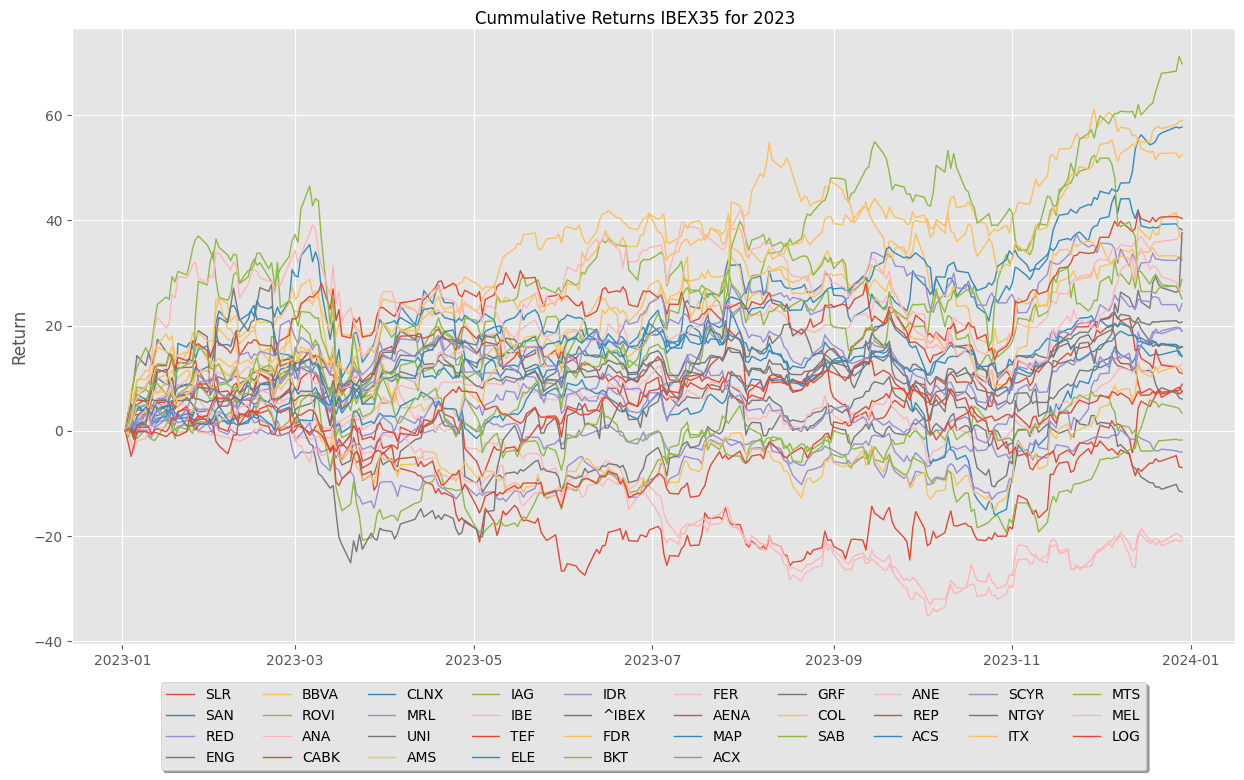

In [39]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(filename.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [40]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=filename.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()